In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

from textblob import TextBlob
import string

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk import tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Redata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
chrome_path = 'C:/Users/Redata/Downloads/read/chromedriver_win32/chromedriver.exe' # my directory for chrome driver
driver = webdriver.Chrome(chrome_path)

In [5]:
s = pd.DataFrame(columns=['text', "title", "publish", "link"])

for a in range(0,1000, 10): # we only got maximal 1000 result
    driver.get(f"https://scholar.google.com/scholar?start={a}&q=neet+young+people+neet+OR+young&hl=id&as_sdt=0,5")
    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight*{random.random()})")
    driver.implicitly_wait(2.2)
    html = driver.page_source
    satu = bs(html)
    i = satu.find_all("div", {"class":"gs_ri"})
    for x in i:
        text = x.get_text() #all text
        #cite = x.get_text().split("Cited by ")[1]
        title = x.find("h3","gs_rt").get_text()
        publish = x.find("div","gs_a").get_text()
        link = str(x.find("h3", {"class":"gs_rt"}))
        s = s.append({'text':text,"title":title, "publish":publish, "link":link}, ignore_index=True)
    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight*{random.random()})")
    driver.implicitly_wait(2.2)

In [6]:
s.to_csv("google_scholar_datascrape(dirty).csv")

# Little bit cleaning

In [7]:
s["cite"] = s["text"].str.split("Dirujuk ", expand=True)[1]
s["link"] = s["link"].str.split("href=", expand=True)[1].str.split("\"", expand=True)[1].str.replace("amp;", "")
d = s["publish"].str.split("-", expand=True).rename(columns={0:"author", 1:"journal/year", 2:"publisher"})
s[d.columns] = d
s["version"] = s["cite"].str.split("terkait ", expand=True)[1]
s["version"] = s["version"].str.extract(r'(\d+)').fillna(1)
s["citation"] = s["cite"].str.extract(r'(\d+)').fillna(0)
s.head()

,text,title,publish,link,cite,author,journal/year,publisher,3,4,version,citation
0,Not so NEET? A critique of the use of 'NEET'in...,Not so NEET? A critique of the use of 'NEET'in...,"S Yates, M Payne - Journal of youth studies, 2...",https://www.tandfonline.com/doi/abs/10.1080/13...,287 kali Artikel terkait 4 versi,"S Yates, M Payne","Journal of youth studies, 2006",Taylor & Francis,None,None,4,287
1,Social exclusion and the transition from schoo...,Social exclusion and the transition from schoo...,"J Bynner, S Parsons - Journal of vocational be...",https://www.sciencedirect.com/science/article/...,573 kali Artikel terkait 6 versi,"J Bynner, S Parsons","Journal of vocational behavior, 2002",Elsevier,None,None,6,573
2,[BUKU][B] NEET young people and training for w...,[BUKU][B] NEET young people and training for w...,"R Simmons, R Thompson - 2011 - eprints.hud.ac.uk",http://eprints.hud.ac.uk/11546,79 kali Artikel terkait 4 versi Cache,"R Simmons, R Thompson",2011,eprints.hud.ac.uk,None,None,4,79
3,[BUKU][B] NEETs: Young people not in employmen...,[BUKU][B] NEETs: Young people not in employmen...,"M Mascherini, L Salvatore, A Meierkord, JM Jun...",https://www.voced.edu.au/content/ngv:54087,119 kali Artikel terkait 2 versi Cache,"M Mascherini, L Salvatore, A Meierkord, JM Jun...",2012,voced.edu.au,None,None,2,119
4,[HTML][HTML] A cross-sectional exploration of ...,[HTML][HTML] A cross-sectional exploration of ...,"B O'Dea, N Glozier, R Purcell, PD McGorry, J S...",https://bmjopen.bmj.com/content/4/12/e006378?u...,55 kali Artikel terkait 16 versi,"B O'Dea, N Glozier, R Purcell, PD McGorry, J S...","BMJ open, 2014",bmjopen.bmj.com,None,None,16,55


In [27]:
o = s["journal/year"].str.extract(r'(\d+)')
p = s["publisher"].str.extract(r'(\d+)')
q = s[3].str.extract(r'(\d+)')
pd.concat([o, p, q], axis=1)
ui = pd.concat([o, p, q], axis=1).fillna(0)
for i in ui.columns:
    ui[i] = ui[i].astype("int")

zz = ui[((ui.iloc[:, 0] >= 1990) & (ui.iloc[:, 0] <= 2020)) | ((ui.iloc[:, 1] >= 1990) & (ui.iloc[:, 1] <= 2020))
        | ((ui.iloc[:, 2] >= 1990) & (ui.iloc[:, 2] <= 2020))]
s["year_publish"] = zz.sum(axis=1)

#still dirty
s["journal"] = s["journal/year"].str.split(",", expand=True)[[0, 1]].dropna()[0]

In [ ]:
keyword = ["young", "youth", "NEET", "NEETs", "education", "training", "employment", "exclusion", 
           "16", "labour", "labor", "Not in"]

In [32]:
s.to_csv("google_scholar_datascrape.csv")

In [31]:
s.sort_values("year_publish").head(10)

,text,title,publish,link,cite,author,journal/year,publisher,3,4,version,citation,journal,year_publish
399,Status zero youth and the underclassH Williams...,Status zero youth and the underclass,"H Williamson - Youth, the 'underclass' and soc...",https://www.taylorfrancis.com/books/e/97802031...,180 kali Artikel terkait 5 versi Versi HTML,H Williamson,"Youth, the 'underclass' and social exclusion ...",taylorfrancis.com,None,None,5,180,Youth,1997.0
372,"Not in education, employment, or training (NEE...","Not in education, employment, or training (NEE...","J Lee, K Woo - The Korean Labour Market after ...",https://www.taylorfrancis.com/books/e/97802031...,2 kali Artikel terkait Versi HTML,"J Lee, K Woo","The Korean Labour Market after the 1997 …, 2013",taylorfrancis.com,None,None,1,2,The Korean Labour Market after the 1997 …,1997.0
80,"[BUKU][B] Young people not in education, emplo...","[BUKU][B] Young people not in education, emplo...",J Payne - 2000 - voced.edu.au,https://www.voced.edu.au/content/ngv:11552,16 kali Artikel terkait Cache,J Payne,2000,voced.edu.au,None,None,1,16,NaN,2000.0
613,"[PERNYATAAN][C] Young people not in education,...","[PERNYATAAN][C] Young people not in education,...","J Payne - LABOUR MARKET TRENDS, 2000 - … HOUSE...",None,10 kali Artikel terkait,J Payne,"LABOUR MARKET TRENDS, 2000",… HOUSE COMMUNICATIONS PLC,None,None,1,10,LABOUR MARKET TRENDS,2000.0
453,[PERNYATAAN][C] A background to youth disaffec...,[PERNYATAAN][C] A background to youth disaffec...,R Steer - 2000 - … Development Foundation London,None,42 kali Artikel terkait,R Steer,2000,… Development Foundation London,None,None,1,42,NaN,2000.0
534,[BUKU][B] Keeping track mapping and tracking v...,[BUKU][B] Keeping track mapping and tracking v...,"A Canny, AE Green, M Maguire - 2001 - micuat.e...",https://micuat.enovation.ie/handle/10395/2179,31 kali Artikel terkait 8 versi Versi HTML,"A Canny, AE Green, M Maguire",2001,micuat.enovation.ie,None,None,8,31,NaN,2001.0
857,Career guidance and social exclusion: a cautio...,Career guidance and social exclusion: a cautio...,AG Watts - British Journal of Guidance & Couns...,https://www.tandfonline.com/doi/abs/10.1080/03...,132 kali Artikel terkait 4 versi,AG Watts,"British Journal of Guidance & Counselling, 2001",Taylor & Francis,None,None,4,132,British Journal of Guidance & Counselling,2001.0
912,"Disconnected youth?R MacDonald, J Marsh - Jour...",Disconnected youth?,"R MacDonald, J Marsh - Journal of youth studie...",https://www.tandfonline.com/doi/abs/10.1080/13...,186 kali Artikel terkait 4 versi,"R MacDonald, J Marsh","Journal of youth studies, 2001",Taylor & Francis,None,None,4,186,Journal of youth studies,2001.0
1,Social exclusion and the transition from schoo...,Social exclusion and the transition from schoo...,"J Bynner, S Parsons - Journal of vocational be...",https://www.sciencedirect.com/science/article/...,573 kali Artikel terkait 6 versi,"J Bynner, S Parsons","Journal of vocational behavior, 2002",Elsevier,None,None,6,573,Journal of vocational behavior,2002.0
75,[BUKU][B] Missing ConneXions: The Career Dynam...,[BUKU][B] Missing ConneXions: The Career Dynam...,"L Britton, B Chatrik, B Coles, G Craig, C Hylt...",https://eric.ed.gov/?id=ED474777,38 kali Artikel terkait Cache,"L Britton, B Chatrik, B Coles, G Craig, C Hylt...",2002,ERIC,None,None,1,38,NaN,2002.0


In [3]:
data = pd.read_csv("google_scholar_datascrape.csv")
data.head()

,Unnamed: 0,text,title,publish,link,cite,author,journal/year,publisher,3,4,version,citation,journal,year_publish
0,0,Not so NEET? A critique of the use of 'NEET'in...,Not so NEET? A critique of the use of 'NEET'in...,"S Yates, M Payne - Journal of youth studies, 2...",https://www.tandfonline.com/doi/abs/10.1080/13...,287 kali Artikel terkait 4 versi,"S Yates, M Payne","Journal of youth studies, 2006",Taylor & Francis,NaN,NaN,4,287,Journal of youth studies,2006.0
1,1,Social exclusion and the transition from schoo...,Social exclusion and the transition from schoo...,"J Bynner, S Parsons - Journal of vocational be...",https://www.sciencedirect.com/science/article/...,573 kali Artikel terkait 6 versi,"J Bynner, S Parsons","Journal of vocational behavior, 2002",Elsevier,NaN,NaN,6,573,Journal of vocational behavior,2002.0
2,2,[BUKU][B] NEET young people and training for w...,[BUKU][B] NEET young people and training for w...,"R Simmons, R Thompson - 2011 - eprints.hud.ac.uk",http://eprints.hud.ac.uk/11546,79 kali Artikel terkait 4 versi Cache,"R Simmons, R Thompson",2011,eprints.hud.ac.uk,NaN,NaN,4,79,NaN,2011.0
3,3,[BUKU][B] NEETs: Young people not in employmen...,[BUKU][B] NEETs: Young people not in employmen...,"M Mascherini, L Salvatore, A Meierkord, JM Jun...",https://www.voced.edu.au/content/ngv:54087,119 kali Artikel terkait 2 versi Cache,"M Mascherini, L Salvatore, A Meierkord, JM Jun...",2012,voced.edu.au,NaN,NaN,2,119,NaN,2012.0
4,4,[HTML][HTML] A cross-sectional exploration of ...,[HTML][HTML] A cross-sectional exploration of ...,"B O'Dea, N Glozier, R Purcell, PD McGorry, J S...",https://bmjopen.bmj.com/content/4/12/e006378?u...,55 kali Artikel terkait 16 versi,"B O'Dea, N Glozier, R Purcell, PD McGorry, J S...","BMJ open, 2014",bmjopen.bmj.com,NaN,NaN,16,55,BMJ open,2014.0


In [28]:
o = data["journal/year"].str.extract(r'(\d+)').rename(columns={0:"s"})
p = data["publisher"].str.extract(r'(\d+)').rename(columns={0:"t"})
q = data["3"].str.extract(r'(\d+)').rename(columns={0:"u"})

ui = pd.concat([o, p, q], axis=1)
#for i in ui.columns:
#    ui[i] = ui[i].astype("int")

In [ ]:
def filll(data):
    if data["s"] == np.nan:
        data["s"] == data[""]

In [36]:
ui = ui.fillna(axis=1, method="backfill")["s"].unique()

array(['2006', '2002', '2011', '2012', '2014', '2009', '2005', '2003',
       '2013', '2010', '2015', '2018', '2008', '2016', '2017', '2000',
       '2007', '2573655', '53', '2', '2019', '2004', '57', '21', '1997',
       '1762004', '2020', '2001', '20', nan, '4', '756', '39', '019', '6',
       '1945', '202', '5'], dtype=object)

In [43]:
for i in ui.columns:
    ui[i] = ui[i].fillna(0).astype("int")
zz = ui[((ui.iloc[:, 0] >= 1990) & (ui.iloc[:, 0] <= 2020)) | ((ui.iloc[:, 1] >= 1990) & (ui.iloc[:, 1] <= 2020))
        | ((ui.iloc[:, 2] >= 1990) & (ui.iloc[:, 2] <= 2020))]
data["year_publish"] = zz["s"]

In [2]:
data = pd.read_csv("g_scholar.csv")
data.head()

,Column1,Unnamed: 0,text,title,publish,link,cite,author,journal/year,publisher,version,citation,journal,Column2,year_publish
0,250,250,Suicide attempt in young people: a signal for ...,Suicide attempt in young people: a signal for ...,"SJ Goldman-Mellor, A Caspi, HL Harrington… - J...",https://jamanetwork.com/journals/jamapsychiatr...,163 kali Artikel terkait 21 versi,SJ Goldman,"Mellor, A Caspi, HL Harrington…","JAMA …, 2014",21,163,Mellor,NaN,2014.0
1,815,815,Models of navigation and life managementM du B...,Models of navigation and life management,M du Bois-Reymond - Handbook of youth and youn...,https://www.taylorfrancis.com/books/e/97802038...,51 kali Artikel terkait 2 versi Versi HTML,M du Bois,Reymond,"Handbook of youth and young adulthood, 2009",2,51,NaN,NaN,2009.0
2,387,387,"[BUKU][B] Risk, protective factors and resilie...","[BUKU][B] Risk, protective factors and resilie...","L Dillon, N Chivite-Matthews, I Grewal, R Brow...",https://dera.ioe.ac.uk/8471/1/rdsolr0407.pdf,50 kali Artikel terkait 8 versi,"L Dillon, N Chivite","Matthews, I Grewal, R Brown…",2007,8,50,Matthews,NaN,2007.0
3,122,122,Postschool educational and employment experien...,Postschool educational and employment experien...,"G Conti-Ramsden, K Durkin - Language, Speech, ...",https://lshss.pubs.asha.org/doi/full/10.1044/0...,48 kali Artikel terkait 15 versi,G Conti,"Ramsden, K Durkin","Language, Speech, and Hearing Services in …, ...",15,48,Ramsden,NaN,2012.0
4,33,33,Will raising the participation age in England ...,Will raising the participation age in England ...,S Maguire - Research in Post-Compulsory Educat...,https://www.tandfonline.com/doi/abs/10.1080/13...,36 kali Artikel terkait 3 versi,S Maguire,Research in Post,"Compulsory Education, 2013",3,36,NaN,NaN,2013.0


In [7]:
oi = data[data["year_publish"] >= 1990]
oi.sample(3)

,Column1,Unnamed: 0,text,title,publish,link,cite,author,journal/year,publisher,version,citation,journal,Column2,year_publish
149,182,182,Precarious Youth and Its Social/Political Disc...,Precarious Youth and Its Social/Political Disc...,"A Inui, M Sano, M Hiratsuka - 人文学報, 2007 - ci....",https://ci.nii.ac.jp/naid/110006483994/,15 kali Artikel terkait Cache,"A Inui, M Sano, M Hiratsuka","人文学報, 2007",ci.nii.ac.jp,1,15,人文学報,NaN,2007.0
546,338,338,Young people and youth policies in Spain in ti...,Young people and youth policies in Spain in ti...,"P Soler, A Planas, C Feixa - International Jou...",https://www.tandfonline.com/doi/abs/10.1080/02...,27 kali Artikel terkait 3 versi,"P Soler, A Planas, C Feixa","International Journal of Adolescence …, 2014",Taylor & Francis,3,27,International Journal of Adolescence …,NaN,2014.0
609,106,106,Caught in a 'spiral'. Barriers to healthy eati...,Caught in a 'spiral'. Barriers to healthy eati...,"J Davison, M Share, M Hennessy, BS Knox - Appe...",https://www.sciencedirect.com/science/article/...,17 kali Artikel terkait 9 versi,"J Davison, M Share, M Hennessy, BS Knox","Appetite, 2015",Elsevier,9,17,Appetite,NaN,2015.0


In [14]:
stopwords1 = set(stopwords.words('indonesian')) # Anticipate fail translating
stopwords2 = set(stopwords.words('english'))
stopwords = stopwords1 | stopwords2 | set(string.punctuation)

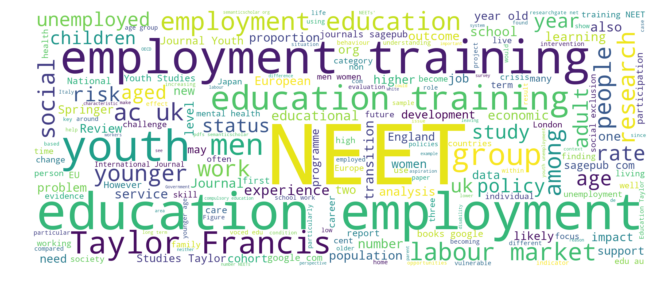

In [19]:
stopwords.update(["PDF", "BUKU", "HTML", "PERNYATAAN", "Artikel", "terkait", "versi", "Dirujuk", "kali", 
                 "page", "Cache", "young", "people", "neet", "NEET"])
word = " ".join(i for i in data["text"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2000, height=836).generate(str(word))
plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()